# BODY MASS INDEX CLASSIFICATION:
This project aims to classify the user data containing infromation about a person's height, weight and gender into five classes as:
 - 0. Extremely Weak
 - 1. Weak
 - 2. Normal
 - 3. Overweight
 - 4. Obesity
 - 5. Extreme Obesity

## Importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Importing Dataset:

In [2]:
df = pd.read_csv('dataset_file_path')

## Checking Dataset:

In [3]:
df.head()

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2


In [4]:
df.tail()

,Gender,Height,Weight,Index
395,Male,166,160,5
396,Male,145,130,5
397,Male,178,138,5
398,Male,168,158,5
399,Male,161,155,5


In [6]:
df.sample(5)

,Gender,Height,Weight,Index
366,Female,153,149,5
356,Male,159,140,5
140,Female,183,87,3
220,Female,167,110,4
218,Male,151,62,3


In [7]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [8]:
df.duplicated().sum()

8

In [17]:
df.shape

(392, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  400 non-null    object
 1   Height  400 non-null    int64 
 2   Weight  400 non-null    int64 
 3   Index   400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [10]:
df.describe()

,Height,Weight,Index
count,400.000000,400.000000,400.000000
mean,170.362500,106.060000,3.737500
std,16.574011,32.362242,1.370507
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,171.000000,106.500000,4.000000
75%,184.000000,136.250000,5.000000
max,199.000000,160.000000,5.000000


## Preprocessing:

- Firstly, we will convert Gender values(Male, Female) to some numerical representation(1,0) so that we can train our ML Models

In [11]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df.head()

,Gender,Height,Weight,Index
0,1,161,89,4
1,1,179,127,4
2,1,172,139,5
3,1,153,104,5
4,1,165,68,2


- Converting Height from centimeters to meters:

In [12]:
df['Height'] = df['Height']/100
df.head()

,Gender,Height,Weight,Index
0,1,1.61,89,4
1,1,1.79,127,4
2,1,1.72,139,5
3,1,1.53,104,5
4,1,1.65,68,2


- Adding new feature 'BMI':

In [13]:
df['BMI'] = df['Weight']/(df['Height']**2)
df.head()

,Gender,Height,Weight,Index,BMI
0,1,1.61,89,4,34.335095
1,1,1.79,127,4,39.636715
2,1,1.72,139,5,46.984857
3,1,1.53,104,5,44.427357
4,1,1.65,68,2,24.977043


- As we had seen above, dataset contains some duplicate entries. Dropping those duplicate values and retaining their first accurance:

In [73]:
df.drop_duplicates(keep = 'first', inplace = True)
df.shape

(392, 5)

## Data Visualization:

<Axes: >

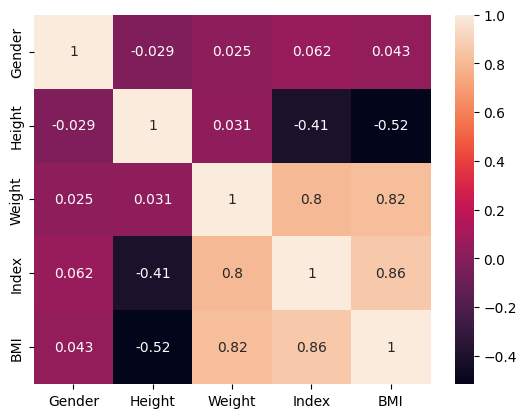

In [24]:
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='Height', ylabel='Count'>

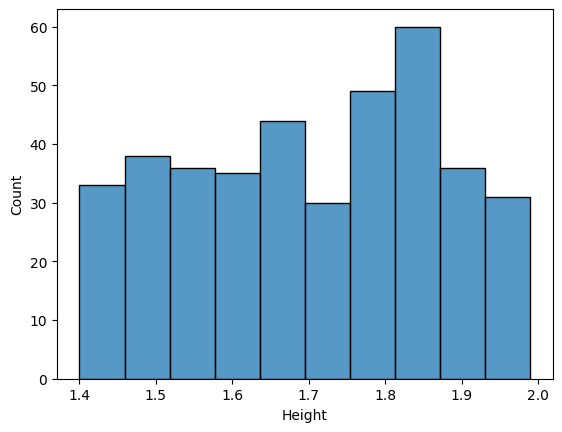

In [22]:
sns.histplot(data = df, x ='Height')

<Axes: xlabel='BMI', ylabel='Count'>

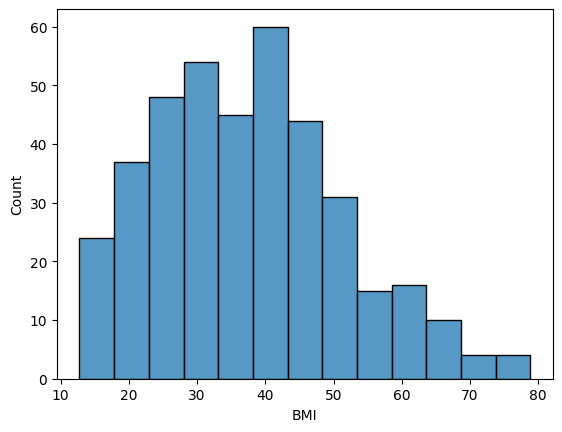

In [28]:
sns.histplot(data = df, x = 'BMI')

<Axes: xlabel='Weight', ylabel='Count'>

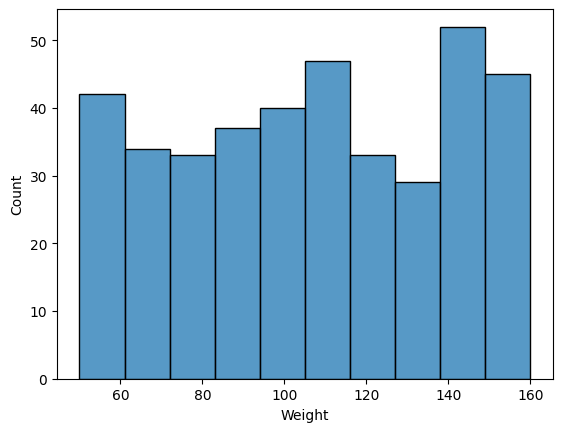

In [29]:
sns.histplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='BMI'>

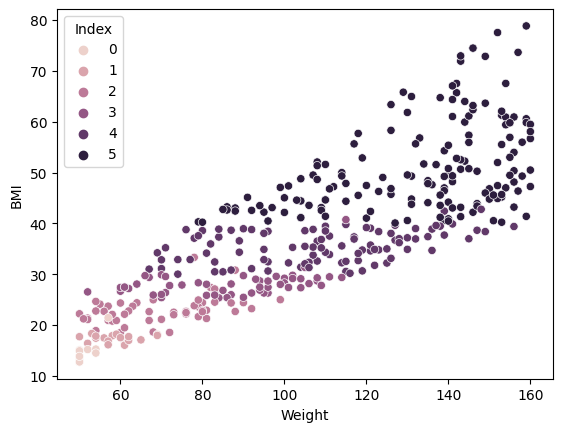

In [32]:
sns.scatterplot(data = df, x = 'Weight', y = 'BMI', hue = 'Index')

## Creating train and test set:

- We will divide the dataset into train set (70%) and test set (30%) so that we can validaet our models:

In [74]:
X = df.drop(['Index'], axis = 1)
y = df['Index']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Training Models:

- We will train 5 most popular classification models and see which one preforms the best. The models we will use are:
- - Random Forest Classifier
- - XGBoost Classifier
- - CatBoost Classifier
- - Support Vector Classifier
- - K-Nearest Neighbors Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [64]:
rf = RandomForestClassifier(n_estimators=400, random_state = 42)
xgbc = XGBClassifier(random_state = 42)
cat = CatBoostClassifier(random_state = 42)
svc = SVC(kernel = 'linear',random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)

In [67]:
model_list = [rf, xgbc, cat, svc, knn]
model_names = ['Random Forest', 'XGBoost', 'CatBoost', 'SVC', 'KNN']
acc_list = []

In [68]:
for model in model_list:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    acc_list.append(accuracy_score(ytest, ypred))

Learning rate set to 0.074071
0:	learn: 1.6473244	total: 10.5ms	remaining: 10.5s
1:	learn: 1.5058646	total: 14.8ms	remaining: 7.38s
2:	learn: 1.4006777	total: 27ms	remaining: 8.97s
3:	learn: 1.2946979	total: 32.3ms	remaining: 8.04s
4:	learn: 1.2344683	total: 42.2ms	remaining: 8.4s
5:	learn: 1.1688032	total: 51ms	remaining: 8.45s
6:	learn: 1.1064013	total: 63.8ms	remaining: 9.05s
7:	learn: 1.0434183	total: 71.7ms	remaining: 8.89s
8:	learn: 0.9932012	total: 74.7ms	remaining: 8.22s
9:	learn: 0.9428323	total: 77.4ms	remaining: 7.66s
10:	learn: 0.8899191	total: 90.3ms	remaining: 8.12s
11:	learn: 0.8460655	total: 98.8ms	remaining: 8.14s
12:	learn: 0.8131174	total: 107ms	remaining: 8.14s
13:	learn: 0.7829791	total: 117ms	remaining: 8.26s
14:	learn: 0.7468305	total: 126ms	remaining: 8.3s
15:	learn: 0.7126177	total: 134ms	remaining: 8.24s
16:	learn: 0.6858356	total: 143ms	remaining: 8.27s
17:	learn: 0.6421560	total: 151ms	remaining: 8.24s
18:	learn: 0.6187363	total: 160ms	remaining: 8.24s
19:	l

In [69]:
model_df = pd.DataFrame({'Model': model_names, 'Accuracy': acc_list})
model_df

,Model,Accuracy
0,Random Forest,0.983051
1,XGBoost,0.991525
2,CatBoost,0.974576
3,SVC,0.966102
4,KNN,0.847458


<Axes: xlabel='Model', ylabel='Accuracy'>

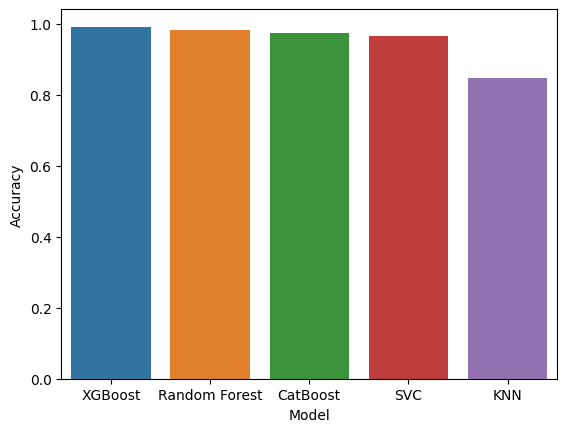

In [71]:
sns.barplot(x = 'Model', y = 'Accuracy', data = model_df, order = model_df.sort_values('Accuracy', ascending = False).Model)

- Thus XGBoost Classifier gives us the best result. Therefore, we will use it as our final classification model.

## Training final Model:

(0.9915254237288136,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x129ad3af490>)

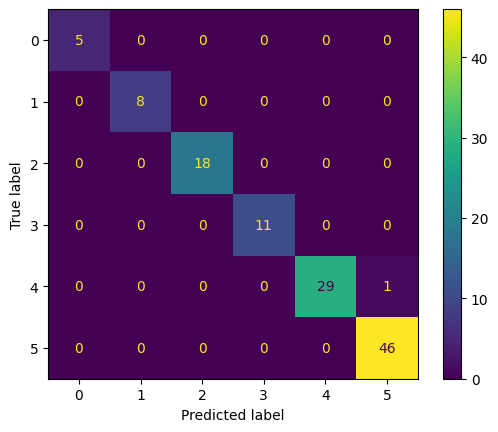

In [72]:
model = XGBClassifier(random_state = 42)
model.fit(xtrain, ytrain)
xbgc = model.predict(xtest)
accuracy_score(ytest, xbgc), ConfusionMatrixDisplay(confusion_matrix(ytest, xbgc)).plot()

- Thus we have trained a classification model with very high accuracy (0.9915) which wrongly predicted only 1 instance from test data.